In [20]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

In [3]:
# Download the cats vs dogs dataset
!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip" \
    -O "/tmp/cats-and-dogs.zip"

local_zip = './cats-and-dogs.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./')
zip_ref.close()

--2023-08-28 23:14:43--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 104.108.251.20
Connecting to download.microsoft.com (download.microsoft.com)|104.108.251.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.67M  6.20MB/s    in 1m 59s  

2023-08-28 23:16:42 (6.63 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824887076/824887076]



In [6]:
# get path of current directory and join it with a folder name
root_dir = os.path.join(os.getcwd(), 'cats-v-dogs')
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

def create_train_val_dirs(root_path):
  
  os.makedirs(os.path.join(root_dir, 'training/cats'))
  os.makedirs(os.path.join(root_dir, 'training/dogs'))
  os.makedirs(os.path.join(root_dir, 'validation/cats'))
  os.makedirs(os.path.join(root_dir, 'validation/dogs'))


try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

# Code to traverse through the directory and print the contents
for dirpath, dirnames, filenames in os.walk(root_dir):
  print(f"There are {len(dirnames)} directories and {len(filenames)} files in '{dirpath}'")


There are 2 directories and 0 files in '/Users/abhilashajha/Documents/Github/year-of-AI/Computer Vision/cats-v-dogs'
There are 2 directories and 0 files in '/Users/abhilashajha/Documents/Github/year-of-AI/Computer Vision/cats-v-dogs/training'
There are 0 directories and 0 files in '/Users/abhilashajha/Documents/Github/year-of-AI/Computer Vision/cats-v-dogs/training/dogs'
There are 0 directories and 0 files in '/Users/abhilashajha/Documents/Github/year-of-AI/Computer Vision/cats-v-dogs/training/cats'
There are 2 directories and 0 files in '/Users/abhilashajha/Documents/Github/year-of-AI/Computer Vision/cats-v-dogs/validation'
There are 0 directories and 0 files in '/Users/abhilashajha/Documents/Github/year-of-AI/Computer Vision/cats-v-dogs/validation/dogs'
There are 0 directories and 0 files in '/Users/abhilashajha/Documents/Github/year-of-AI/Computer Vision/cats-v-dogs/validation/cats'


In [7]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
  """
  Splits the data into train and test sets
  
  Args:
    SOURCE_DIR (string): directory path containing the images
    TRAINING_DIR (string): directory path to be used for training
    VALIDATION_DIR (string): directory path to be used for validation
    SPLIT_SIZE (float): proportion of the dataset to be used for training
    
  Returns:
    None
  """
  L=[]
  for val in os.listdir(SOURCE_DIR):
    src_file_name = os.path.join(SOURCE_DIR,val)
    if os.path.getsize(src_file_name)>0:
      L.append(val)
    else:
      print(f"{val} is zero length, so ignoring.")

  
  random.sample(L, len(L)) #randomize the list of files
  train_size = int(SPLIT_SIZE * len(L))
  training_set = L[:train_size]
  validation_set = L[train_size:]

  for val in training_set:
    src_file_name = os.path.join(SOURCE_DIR,val)
    dest_file_name = os.path.join(TRAINING_DIR,val)
    copyfile(src_file_name,dest_file_name)

  for val in validation_set:
    src_file_name = os.path.join(SOURCE_DIR,val)
    dest_file_name = os.path.join(VALIDATION_DIR,val)
    copyfile(src_file_name,dest_file_name)

In [8]:
# Define paths for the source and destination directories
CAT_SOURCE_DIR = "./cats-and-dogs/PetImages/Cat/"
DOG_SOURCE_DIR = "./cats-and-dogs/PetImages/Dog/"

TRAINING_DIR = "./cats-v-dogs/training/"
VALIDATION_DIR = "./cats-v-dogs/validation/"

TRAINING_CATS_DIR = os.path.join(TRAINING_DIR, "cats/")
VALIDATION_CATS_DIR = os.path.join(VALIDATION_DIR, "cats/")

TRAINING_DOGS_DIR = os.path.join(TRAINING_DIR, "dogs/")
VALIDATION_DOGS_DIR = os.path.join(VALIDATION_DIR, "dogs/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_CATS_DIR)) > 0:
  for file in os.scandir(TRAINING_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_DOGS_DIR)) > 0:
  for file in os.scandir(TRAINING_DOGS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_CATS_DIR)) > 0:
  for file in os.scandir(VALIDATION_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_DOGS_DIR)) > 0:
  for file in os.scandir(VALIDATION_DOGS_DIR):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .9

split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, VALIDATION_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, VALIDATION_DOGS_DIR, split_size)

print(f"\n\nOriginal cat's directory has {len(os.listdir(CAT_SOURCE_DIR))} images")
print(f"Original dog's directory has {len(os.listdir(DOG_SOURCE_DIR))} images\n")

print(f"There are {len(os.listdir(TRAINING_CATS_DIR))} images of cats for training")
print(f"There are {len(os.listdir(TRAINING_DOGS_DIR))} images of dogs for training")
print(f"There are {len(os.listdir(VALIDATION_CATS_DIR))} images of cats for validation")
print(f"There are {len(os.listdir(VALIDATION_DOGS_DIR))} images of dogs for validation")

666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


Original cat's directory has 12501 images
Original dog's directory has 12501 images

There are 11250 images of cats for training
There are 11250 images of dogs for training
There are 1250 images of cats for validation
There are 1250 images of dogs for validation


In [30]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
    """
    Creates the training and validation data generators
    
    Args:
        TRAINING_DIR (string): directory path containing the training images
        VALIDATION_DIR (string): directory path containing the testing/validation images
        
    Returns:
        train_generator, validation_generator - tuple containing the generators
    """

    train_datagen = ImageDataGenerator(rescale=1./255)

    # train_generator takes images from the training directory, in batches of 20, and resizes them to 150x150
    train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                        batch_size=20,
                                                        class_mode='binary',
                                                        target_size=(150,150))

    validation_datagen = ImageDataGenerator(rescale=1./255)

    # validation_generator takes images from the validation directory, in batches of 20, and resizes them to 150x150

    validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                    batch_size=20,
                                                                    class_mode='binary',
                                                                    target_size=(150,150))

    return train_generator, validation_generator



# test the function

train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)


Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [31]:
# Create Model

# What is the need to increase the number of filters with layers?

# Why does the size of the image representation decrease with layers?
# The size of the image representation decreases with layers because of the MaxPooling2D layer.

# Why do we flatten the image representation before the dense layers?
# We flatten the image representation before the dense layers because the dense layers only take 1D inputs.

# Why do we use binary_crossentropy for a binary classification problem?
# We use binary_crossentropy for a binary classification problem because it is a binary classification loss function. The binary_crossentropy
# loss function looks like this: -ylog(p) - (1-y)log(1-p), where y is the true label and p is the predicted label.
from tensorflow.keras.optimizers import RMSprop

def create_model():

    
    model = tf.keras.models.Sequential(
        [
            tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)), # Here, the arguments taken by Conv2D are: number of filters, filter size, activation function, and input shape
            tf.keras.layers.MaxPooling2D(2,2), # MaxPooling2D is used to reduce the size of the image representation by half
            tf.keras.layers.Conv2D(32, (3,3), activation='relu'), # Input size of 2nd conv layer for a 150x150 image is 74x74x32
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(64, (3,3), activation='relu'), # Input size of 3rd conv layer for a 150x150 image is 36x36x64
            tf.keras.layers.MaxPooling2D(2,2), 
            tf.keras.layers.Flatten(), # After flattening the size of the image representation is 12x12x64 = 9216
            tf.keras.layers.Dense(512, activation='relu'), # 512 neurons in the dense layer
            # the output layer has only 1 neuron because we are using binary classification, 0 for cats and 1 for dogs
            tf.keras.layers.Dense(1, activation='sigmoid') # 1 neuron in the output layer

        ]
    )

    # set optimizer to RMSprop and loss function to binary_crossentropy
    model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [32]:
# Get the untrained model
model = create_model()

# Train the model
# Note that this may take some time.
history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/15


2023-08-29 13:07:40.738361: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1124/1125 [============================>.] - ETA: 0s - loss: 0.5890 - accuracy: 0.6935

2023-08-29 13:08:29.389481: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1125/1125 [==============================] - 53s 46ms/step - loss: 0.5888 - accuracy: 0.6937 - val_loss: 0.4683 - val_accuracy: 0.7732
Epoch 2/15
1125/1125 [==============================] - 50s 45ms/step - loss: 0.4550 - accuracy: 0.7861 - val_loss: 0.4287 - val_accuracy: 0.8112
Epoch 3/15
1125/1125 [==============================] - 54s 48ms/step - loss: 0.3995 - accuracy: 0.8249 - val_loss: 0.4138 - val_accuracy: 0.8100
Epoch 4/15
1125/1125 [==============================] - 51s 46ms/step - loss: 0.3614 - accuracy: 0.8439 - val_loss: 0.3934 - val_accuracy: 0.8300
Epoch 5/15
1125/1125 [==============================] - 53s 47ms/step - loss: 0.3357 - accuracy: 0.8616 - val_loss: 0.5078 - val_accuracy: 0.8016
Epoch 6/15
1125/1125 [==============================] - 52s 46ms/step - loss: 0.3154 - accuracy: 0.8710 - val_loss: 0.4068 - val_accuracy: 0.8284
Epoch 7/15
1125/1125 [==============================] - 54s 48ms/step - loss: 0.3013 - accuracy: 0.8769 - val_loss: 0.4107 - val_accura

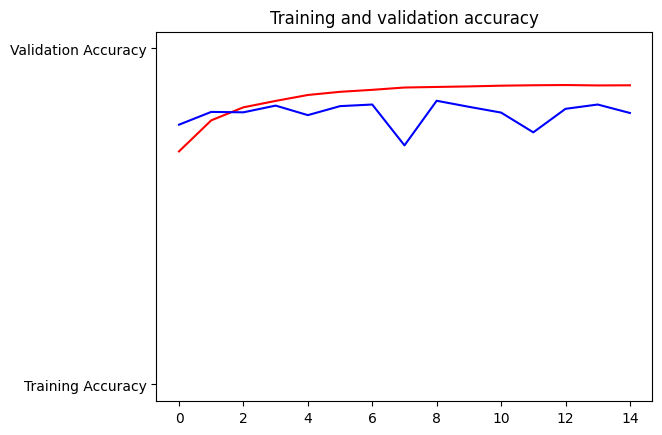

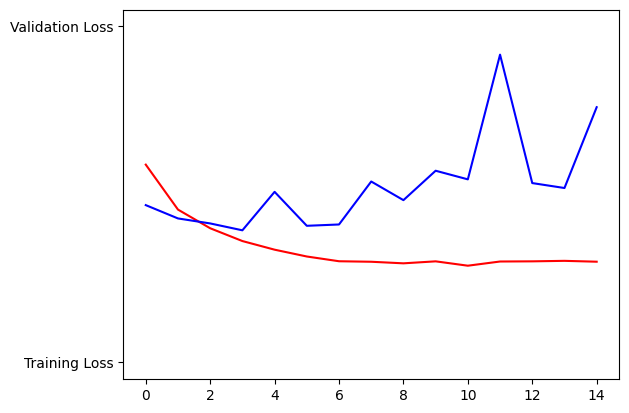

In [34]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [35]:
model.summary()

model.save("cats_vs_dogs.h5")

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 17, 17, 64)      